In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

DATASET_PATH = "dataset"

inv_part = pd.read_csv(DATASET_PATH + "/inventory_parts.csv")
colors = pd.read_csv(DATASET_PATH + "/colors.csv")
colors.rename(columns = {'id':'color_id'}, inplace = True)
inv_part_colors = inv_part.merge(colors, on='color_id', how='left')
inv_part_colors.rename(columns = {'inventory_id':'id'}, inplace = True)

inv_part_colors.isna().sum().sum()
inv_part_colors.head()
inv_part_colors.shape

(580251, 8)

In [20]:
inv = pd.read_csv(DATASET_PATH + "/inventories.csv")
sets = pd.read_csv(DATASET_PATH + "/sets.csv")
inv_sets = inv.merge(sets, on='set_num', how='left')

#inv_parts_inv_sets.head(10)
#inv_sets.isna().sum()
inv_sets.shape

(11681, 7)

In [24]:
df = inv_part_colors.merge(inv_sets, on='id', how='left')
df.shape
inv_part_colors.isna().sum().sum()
df.head()

,id,part_num,color_id,quantity,is_spare,name_x,rgb,is_trans,version,set_num,name_y,year,theme_id,num_parts
0,1,48379c01,72,1,f,Dark Bluish Gray,6C6E68,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
1,1,48395,7,1,f,Light Gray,9BA19D,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
2,1,mcsport6,25,1,f,Orange,FE8A18,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
3,1,paddle,0,1,f,Black,05131D,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
4,3,11816pr0005,78,1,f,Light Flesh,F6D7B3,f,1,3931-1,Emma's Splash Pool,2012,494,43


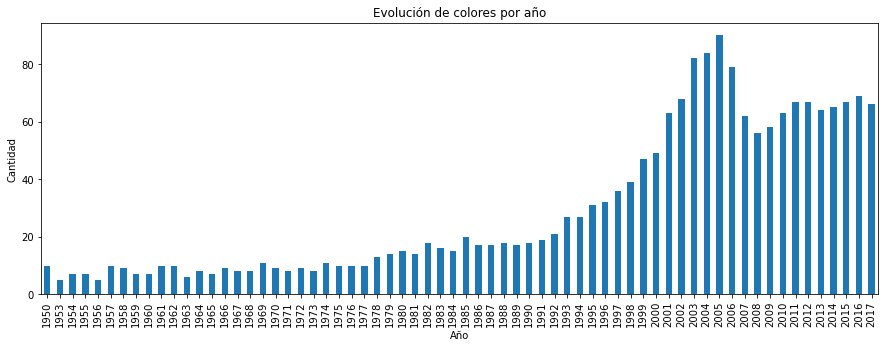

In [48]:
df.groupby('year')['rgb'].nunique().plot(kind = 'bar', figsize = (15,5))
plt.title("Evolución de colores por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()

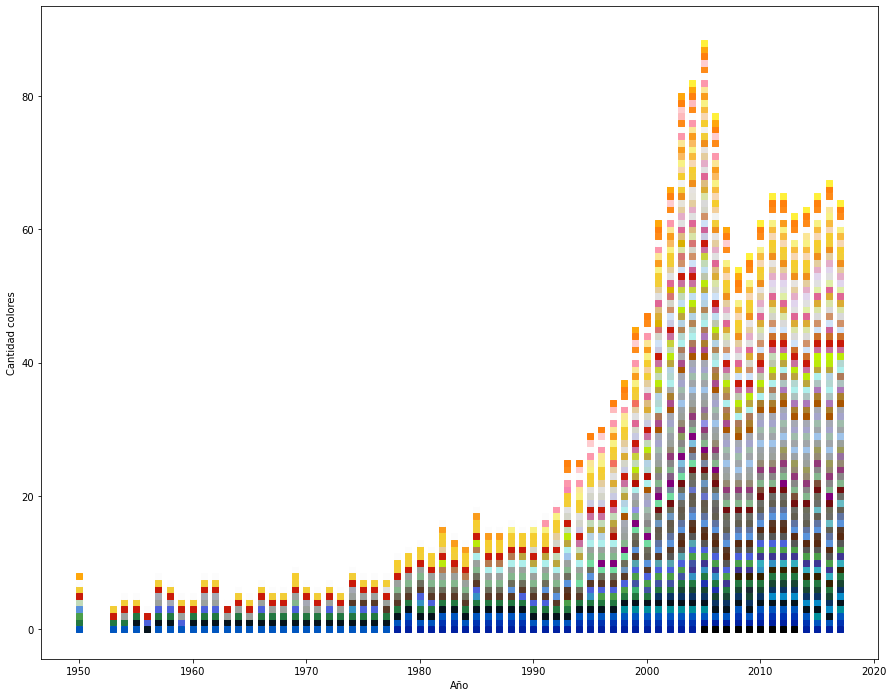

In [156]:
year_group=df.groupby('year',as_index=False)['rgb'].nunique()

plt.figure(figsize=(15,12))
for i in range(len(year_group)):
    colors = np.sort(df[df['year'] == year_group['year'][i]]['rgb'].unique())
    plt.scatter(year_group['year'][i]*np.ones(year_group['rgb'][i]),range(year_group['rgb'][i]), c = np.char.add('#',colors), marker = 's')

plt.xlabel("Año")
plt.ylabel("Cantidad colores")
plt.show()